In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
pd.__version__

'0.23.0'

case nogoods
            #output - seller has no goods to sell
            elif common.cycle==common.startHayekianMarket:
                     common.wr.writerow\
                     (["nogoods", "buy", numpy.nan, self.consumption, self.number,\
                     "sell", numpy.nan,mySeller.number])
cases deal, nodeal
            #output - deal vs. nodeal
            if common.cycle==common.startHayekianMarket:
                if mySeller.statusS==1:
                    common.wr.writerow\
                    (["deal", "buy", self.buyPrice, self.consumption, self.number,\
                    "sell", mySeller.sellPrice,mySeller.number])
                if mySeller.statusS==-1 and mySeller.sellPriceDefined:
                    common.wr.writerow\
                    (["nodeal", "buy", self.buyPrice, self.consumption, self.number,\
                    "sell", mySeller.sellPrice,mySeller.number])
case seller list empty                    
          #output - self.sellerList==[]
          elif common.cycle==common.startHayekianMarket:
               common.wr.writerow\
                (["nosellers", "buy", self.buyPrice, self.consumption, self.number,\
                "sell", numpy.nan,numpy.nan])
case no more consumption capability
        #output - self.consumption<=0
        elif common.cycle==common.startHayekianMarket:
             common.wr.writerow\
               (["noconsumption", "buy", numpy.nan, self.consumption, self.number,\
               "sell", numpy.nan,numpy.nan])




In [4]:
df=pd.read_csv('firstStepOutputInHayekianMarket.csv',header=None,usecols=[0,2,3,6],names=['result',
              'buy','consumptions','sell'])

In [5]:
df.head()

,result,buy,consumptions,sell
0,nodeal,0.998850,0.991967,1.104867
1,nodeal,1.007903,1.121623,1.058240
2,nodeal,0.995738,1.115292,1.033457
3,nodeal,1.006606,0.959062,1.058234
4,nodeal,1.009819,1.015821,1.033951


In [6]:
df.count()

result          300300
buy             220845
consumptions    300300
sell            220845
dtype: int64

In [7]:
df.groupby('result').count()

,buy,consumptions,sell
result,,,
deal,101145,101145,101145
noconsumption,0,67065,0
nodeal,119700,119700,119700
nogoods,0,12390,0


In [8]:
df.describe()

,buy,consumptions,sell
count,220845.000000,3.003000e+05,220845.000000
mean,1.032601,3.659973e-01,1.038023
std,0.023241,3.509969e-01,0.011513
min,0.938624,-1.387779e-17,1.017077
25%,1.018334,0.000000e+00,1.034880
50%,1.033725,2.796486e-01,1.035698
75%,1.048590,6.582370e-01,1.036709
max,1.124337,1.372801e+00,1.116162


In [9]:
# create a new col with true if ...
deal = df['result'] == "deal"

In [10]:
# used only to undestand the operation above
df[df['result'] == "deal"].head()

,result,buy,consumptions,sell
11,deal,1.035063,0.723457,1.033403
20,deal,1.034919,0.924548,1.033884
26,deal,1.040444,0.932907,1.033394
86,deal,1.039783,0.752510,1.033754
96,deal,1.041998,0.812414,1.033782


In [11]:
df[deal].head()

,result,buy,consumptions,sell
11,deal,1.035063,0.723457,1.033403
20,deal,1.034919,0.924548,1.033884
26,deal,1.040444,0.932907,1.033394
86,deal,1.039783,0.752510,1.033754
96,deal,1.041998,0.812414,1.033782


In [12]:
df[deal].describe(include=numpy.number)

,buy,consumptions,sell
count,101145.000000,1.011450e+05,101145.000000
mean,1.051755,4.092023e-01,1.035226
std,0.012198,2.961820e-01,0.004281
min,1.017250,-1.387779e-17,1.017077
25%,1.042094,1.406152e-01,1.034783
50%,1.049835,3.819191e-01,1.035563
75%,1.059867,6.577819e-01,1.036313
max,1.124337,1.235521e+00,1.080380


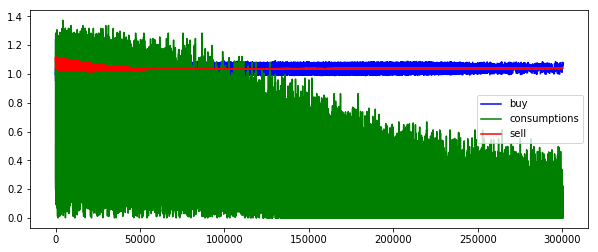

In [13]:
df.plot(figsize=(10,4),color=['b','g','r'])

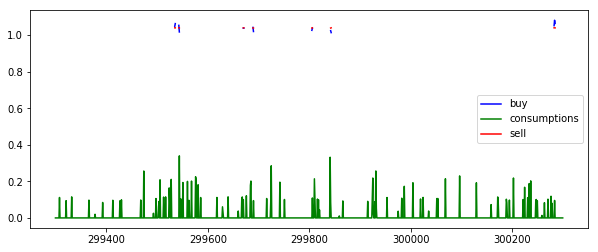

In [14]:
df.tail(1000).plot(figsize=(10,4),color=['b','g','r'])

In [15]:
df.tail(75000).groupby('result').count()

,buy,consumptions,sell
result,,,
deal,6846,6846,6846
noconsumption,0,52215,0
nodeal,6219,6219,6219
nogoods,0,9720,0


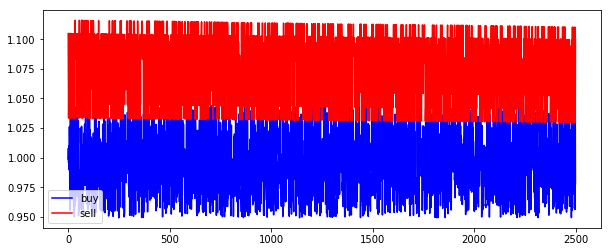

In [16]:
df.head(2500).drop(columns='consumptions').plot(figsize=(10,4),color=['b','r'])

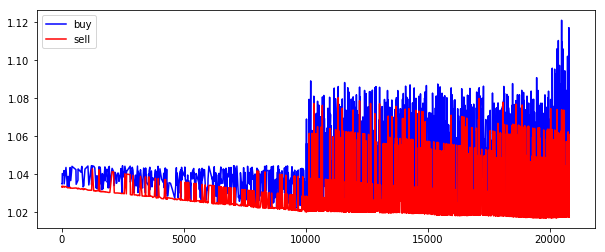

In [17]:
df[deal].head(2500).drop(columns='consumptions').plot(figsize=(10,4),color=['b','r'])

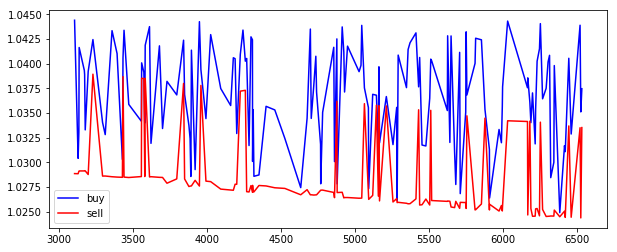

In [18]:
df[deal][100:250].drop(columns='consumptions').plot(figsize=(10,4),color=['b','r'])

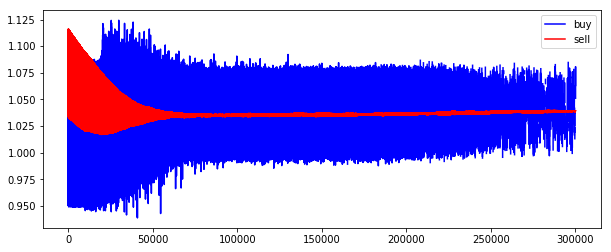

In [19]:
df.drop(columns='consumptions').plot(figsize=(10,4),color=['b','r'])

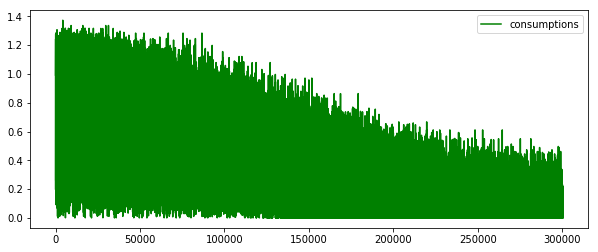

In [20]:
#df.tail(1000).drop(columns=['buy','sell']).plot(figsize=(10,4),color='g')
#df.head(1000).drop(columns=['buy','sell']).plot(figsize=(10,4),color='g')
df.drop(columns=['buy','sell']).plot(figsize=(10,4),color='g')

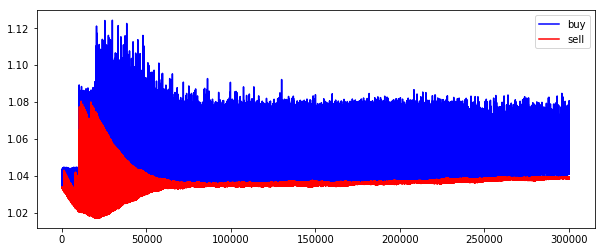

In [21]:
df[deal].drop(columns='consumptions').plot(figsize=(10,4),color=['b','r'])

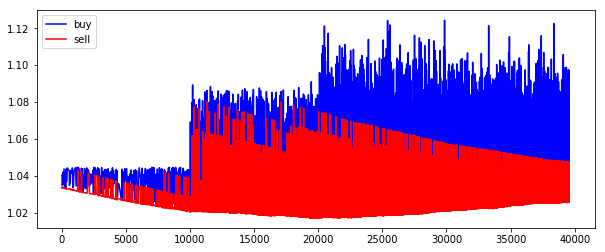

In [22]:
df[deal].head(10000).drop(columns='consumptions').plot(figsize=(10,4),color=['b','r'])

In [23]:
df[deal].head(1000).describe(include=numpy.number,percentiles=[.25, .5, .75,0.95])

,buy,consumptions,sell
count,1000.000000,1000.000000,1000.000000
mean,1.042783,0.827940,1.028380
std,0.014477,0.218633,0.010447
min,1.020446,0.064629,1.019778
25%,1.033128,0.800815,1.020804
50%,1.039820,0.886142,1.026329
75%,1.046894,0.954834,1.030873
95%,1.072944,1.040363,1.057954
max,1.089229,1.185131,1.080380


In [24]:
df.head(1000).describe(include=numpy.number,percentiles=[.25, .5, .75,0.95])

,buy,consumptions,sell
count,1000.000000,1000.000000,1000.000000
mean,0.995422,0.915479,1.075703
std,0.028243,0.240287,0.030179
min,0.948993,0.069446,1.031799
25%,0.970310,0.891646,1.044166
50%,0.994808,0.977341,1.083705
75%,1.019947,1.049735,1.103189
95%,1.039896,1.155248,1.115057
max,1.044237,1.306815,1.116162
